## Interview Based Assessment

# Python

In [15]:
# Solution 1

def find_highest_frequency_word_length(string):
    # Split the string into individual words
    words = string.split()

    # Count the frequency of each word using a dictionary
    word_count = {}
    for word in words:
        word_count[word] = word_count.get(word, 0) + 1

    # Find the highest frequency
    max_frequency = max(word_count.values())

    # Find the length(s) of the highest-frequency word(s)
    highest_frequency_words = [word for word, frequency in word_count.items() if frequency == max_frequency]
    highest_frequency_word_lengths = [len(word) for word in highest_frequency_words]

    return max(highest_frequency_word_lengths)

# Prompt the user to enter a string
string = input("Enter a string: ")

# Call the function and display the result
result = find_highest_frequency_word_length(string)
print(result)

Enter a string: write write write all the number from from from 1 to 100
5


In [4]:
# Solution 2

from collections import Counter

def is_valid_string(s):
    char_freq = Counter(s)
    freq_values = char_freq.values()
    max_freq = max(freq_values)
    min_freq = min(freq_values)

    if max_freq == min_freq or (max_freq - min_freq == 1 and freq_values.count(max_freq) == 1):
        return "YES"
    else:
        return "NO"

# Take user input
s = input("Enter a string: ")

# Check if the string is valid
result = is_valid_string(s)
print(result)

Enter a string: aaadfgdsrf
NO


In [10]:
# Solution 3

import requests
import pandas as pd

# Download data from the link
url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"
response = requests.get(url)
data = response.json()

# Extract required attributes from the data
structured_data = []
for pokemon in data["pokemon"]:
    attributes = {
        "id": pokemon.get("id", ""),
        "num": pokemon.get("num", ""),
        "name": pokemon.get("name", ""),
        "img": pokemon.get("img", ""),
        "type": ",".join(pokemon.get("type", [])),
        "height": pokemon.get("height", ""),
        "weight": pokemon.get("weight", ""),
        "candy": pokemon.get("candy", ""),
        "candy_count": pokemon.get("candy_count", ""),
        "egg": pokemon.get("egg", ""),
        "spawn_chance": pokemon.get("spawn_chance", ""),
        "avg_spawns": pokemon.get("avg_spawns", ""),
        "spawn_time": pokemon.get("spawn_time", ""),
        "multipliers": ",".join(map(str, pokemon.get("multipliers", []))) if pokemon.get("multipliers") else "",
        "weakness": ",".join(pokemon.get("weaknesses", [])),
        "next_evolution": ",".join([evolution.get("num", "") + " " + evolution.get("name", "") for evolution in pokemon.get("next_evolution", [])]),
        "prev_evolution": ",".join([evolution.get("num", "") + " " + evolution.get("name", "") for evolution in pokemon.get("prev_evolution", [])])
    }
    structured_data.append(attributes)

# Convert structured data to DataFrame
df = pd.DataFrame(structured_data)

# Save DataFrame to Excel
output_filename = "pokemon_data.xlsx"
df.to_excel(output_filename, index=False)

print("Data has been converted and saved to", output_filename)

Data has been converted and saved to pokemon_data.xlsx


In [9]:
df = pd.read_excel('pokemon_data.xlsx')
df

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weakness,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass,Poison",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.6900,69.00,20:00,1.58,"Fire,Ice,Flying,Psychic","002 Ivysaur,003 Venusaur",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass,Poison",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,4.20,07:00,"1.2,1.6","Fire,Ice,Flying,Psychic",003 Venusaur,001 Bulbasaur
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass,Poison",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,11:30,NaN,"Fire,Ice,Flying,Psychic",NaN,"001 Bulbasaur,002 Ivysaur"
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,25.30,08:45,1.65,"Water,Ground,Rock","005 Charmeleon,006 Charizard",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,1.79,"Water,Ground,Rock",006 Charizard,004 Charmander
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,Dragon,1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,30.00,06:41,"1.83,1.84","Ice,Dragon,Fairy","148 Dragonair,149 Dragonite",NaN
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,Dragon,3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,2.05,"Ice,Dragon,Fairy",149 Dragonite,147 Dratini
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"Dragon,Flying",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,0.11,23:38,NaN,"Ice,Rock,Dragon,Fairy",NaN,"147 Dratini,148 Dragonair"
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,Psychic,2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,NaN,"Bug,Ghost,Dark",NaN,NaN


In [48]:
import requests
import pandas as pd

# Download data from the link
url = "https://data.nasa.gov/resource/y77d-th95.json"
response = requests.get(url)
data = response.json()

# Extract required attributes from the data
structured_data = []
for meteorite in data:
    reclat = meteorite.get("reclat", "")
    reclong = meteorite.get("reclong", "")
    reclat = int(float(reclat)) if reclat else 0
    reclong = int(float(reclong)) if reclong else 0

    mass = meteorite.get("mass", "")
    mass = float(mass) if mass else 0  # Assign 0 for NaN mass values

    attributes = {
        "name": meteorite.get("name", ""),
        "id": meteorite.get("id", ""),
        "nametype": meteorite.get("nametype", ""),
        "recclass": meteorite.get("recclass", ""),
        "mass": mass,
        "year": meteorite.get("year", ""),
        "reclat": reclat,
        "reclong": reclong,
        "coordinates": [reclat, reclong]
    }
    structured_data.append(attributes)

# Convert structured data to DataFrame
df = pd.DataFrame(structured_data)

# Save DataFrame to CSV
output_filename = "meteorite_data.csv"
df.to_csv(output_filename, index=False)

print("Data has been converted and saved to", output_filename)

Data has been converted and saved to meteorite_data.csv


In [49]:
df1 = pd.read_csv('meteorite_data.csv')
df1

,name,id,nametype,recclass,mass,year,reclat,reclong,coordinates
0,Aachen,1,Valid,L5,21.0,1880-01-01T00:00:00.000,50,6,"[50, 6]"
1,Aarhus,2,Valid,H6,720.0,1951-01-01T00:00:00.000,56,10,"[56, 10]"
2,Abee,6,Valid,EH4,107000.0,1952-01-01T00:00:00.000,54,-113,"[54, -113]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,1976-01-01T00:00:00.000,16,-99,"[16, -99]"
4,Achiras,370,Valid,L6,780.0,1902-01-01T00:00:00.000,-33,-64,"[-33, -64]"
...,...,...,...,...,...,...,...,...,...
995,Tirupati,24009,Valid,H6,230.0,1934-01-01T00:00:00.000,13,79,"[13, 79]"
996,Tissint,54823,Valid,Martian (shergottite),7000.0,2011-01-01T00:00:00.000,29,-7,"[29, -7]"
997,Tjabe,24011,Valid,H6,20000.0,1869-01-01T00:00:00.000,-7,111,"[-7, 111]"
998,Tjerebon,24012,Valid,L5,16500.0,1922-01-01T00:00:00.000,-6,106,"[-6, 106]"


In [5]:
import requests
import json
import re
import csv

# Download data from the API link
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
response = requests.get(url)
data = response.json()

# Extract required attributes from the data
show_id = data.get("id", "")
show_url = data.get("url", "")
show_name = data.get("name", "")

episodes = data.get("_embedded", {}).get("episodes", [])
episode_data = []
for episode in episodes:
    episode_id = episode.get("id", "")
    episode_season = episode.get("season", "")
    episode_number = episode.get("number", "")
    episode_type = episode.get("type", "")
    episode_airdate = episode.get("airdate", "")
    episode_airtime = episode.get("airtime", "")
    episode_runtime = episode.get("runtime", "")
    episode_average_rating = episode.get("rating", {}).get("average", "")
    episode_summary = episode.get("summary", "")
    episode_summary = re.sub('<[^<]+?>', '', episode_summary)  # Remove HTML tags from summary
    episode_image = episode.get("image", {}).get("medium", "")
    episode_original_image = episode.get("image", {}).get("original", "")

    episode_attributes = {
        "id": episode_id,
        "url": show_url,
        "name": show_name,
        "season": episode_season,
        "number": episode_number,
        "type": episode_type,
        "airdate": episode_airdate,
        "airtime": episode_airtime,
        "runtime": episode_runtime,
        "average_rating": episode_average_rating,
        "summary": episode_summary,
        "medium_image_link": episode_image,
        "original_image_link": episode_original_image
    }
    episode_data.append(episode_attributes)

# Save the extracted episode data to a CSV file
output_filename = "episode_data.csv"
with open(output_filename, "w", newline="", encoding="utf-8") as file:
    writer = csv.DictWriter(file, fieldnames=episode_data[0].keys())
    writer.writeheader()
    writer.writerows(episode_data)

print("Data has been saved to", output_filename)

Data has been saved to episode_data.csv


In [7]:
df2 = pd.read_csv('episode_data.csv')

In [8]:
df2

,id,url,name,season,number,type,airdate,airtime,runtime,average_rating,summary,medium_image_link,original_image_link
0,869671,https://www.tvmaze.com/shows/1371/westworld,Westworld,1,1,regular,2016-10-02,21:00,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/shows/1371/westworld,Westworld,1,2,regular,2016-10-09,21:00,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/shows/1371/westworld,Westworld,1,3,regular,2016-10-16,21:00,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/shows/1371/westworld,Westworld,1,4,regular,2016-10-23,21:00,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/shows/1371/westworld,Westworld,1,5,regular,2016-10-30,21:00,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
5,932057,https://www.tvmaze.com/shows/1371/westworld,Westworld,1,6,regular,2016-11-06,21:00,60,8.0,"While Maeve convinces Felix to show her ""upsta...",https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
6,938404,https://www.tvmaze.com/shows/1371/westworld,Westworld,1,7,regular,2016-11-13,21:00,60,8.6,While William and Dolores travel to the unclai...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
7,943065,https://www.tvmaze.com/shows/1371/westworld,Westworld,1,8,regular,2016-11-20,21:00,60,7.9,Bernard tries to cope with what he did under R...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
8,943066,https://www.tvmaze.com/shows/1371/westworld,Westworld,1,9,regular,2016-11-27,21:00,60,8.5,Bernard forces Robert to take him back into hi...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
9,943067,https://www.tvmaze.com/shows/1371/westworld,Westworld,1,10,regular,2016-12-04,21:00,90,8.7,Delores finds out the truth about William's fa...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [10]:
df

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weakness,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass,Poison",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.6900,69.00,20:00,1.58,"Fire,Ice,Flying,Psychic","002 Ivysaur,003 Venusaur",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass,Poison",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,4.20,07:00,"1.2,1.6","Fire,Ice,Flying,Psychic",003 Venusaur,001 Bulbasaur
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass,Poison",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,11:30,NaN,"Fire,Ice,Flying,Psychic",NaN,"001 Bulbasaur,002 Ivysaur"
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,25.30,08:45,1.65,"Water,Ground,Rock","005 Charmeleon,006 Charizard",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,1.79,"Water,Ground,Rock",006 Charizard,004 Charmander
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,Dragon,1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,30.00,06:41,"1.83,1.84","Ice,Dragon,Fairy","148 Dragonair,149 Dragonite",NaN
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,Dragon,3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,2.05,"Ice,Dragon,Fairy",149 Dragonite,147 Dratini
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"Dragon,Flying",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,0.11,23:38,NaN,"Ice,Rock,Dragon,Fairy",NaN,"147 Dratini,148 Dragonair"
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,Psychic,2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,NaN,"Bug,Ghost,Dark",NaN,NaN


In [18]:
# Solution 6
# Get all Pokemons whose spawn rate is less than 5%
df.loc[df['spawn_chance'] < 5, 'name']

0       Bulbasaur
1         Ivysaur
2        Venusaur
3      Charmander
4      Charmeleon
          ...    
146       Dratini
147     Dragonair
148     Dragonite
149        Mewtwo
150           Mew
Name: name, Length: 147, dtype: object

In [19]:
#Get all Pokemons that have less than 4 weaknesses
df[df['weakness'].apply(lambda weaknesses: len(weaknesses.split(','))) < 4]['name']

3      Charmander
4      Charmeleon
5       Charizard
6        Squirtle
7       Wartortle
          ...    
145       Moltres
146       Dratini
147     Dragonair
149        Mewtwo
150           Mew
Name: name, Length: 102, dtype: object

In [20]:
# Get all Pokemons that have no multipliers at all
df[df['multipliers'].isnull()]['name']

2        Venusaur
5       Charizard
8       Blastoise
11     Butterfree
14       Beedrill
          ...    
144        Zapdos
145       Moltres
148     Dragonite
149        Mewtwo
150           Mew
Name: name, Length: 81, dtype: object

In [22]:
# Get all Pokemons that do not have more than 2 evolutions
df[df['next_evolution'].apply(lambda evolutions: len(str(evolutions).split(','))) <= 2]['name']

0       Bulbasaur
1         Ivysaur
2        Venusaur
3      Charmander
4      Charmeleon
          ...    
146       Dratini
147     Dragonair
148     Dragonite
149        Mewtwo
150           Mew
Name: name, Length: 150, dtype: object

In [25]:
# Get all Pokemons whose spawn time is less than 300 seconds.
df['spawn_time'] = df['spawn_time'].apply(lambda time: int(str(time).split(':')[0])*60 + int(str(time).split(':')[1]) if not pd.isna(time) else 0)
df[df['spawn_time'] < 300]['name']

6       Squirtle
8      Blastoise
10       Metapod
12        Weedle
13        Kakuna
         ...    
143     Articuno
144       Zapdos
145      Moltres
149       Mewtwo
150          Mew
Name: name, Length: 81, dtype: object

In [26]:
# Get all Pokemon who have more than two types of capabilities
df[df['type'].apply(lambda types: len(types.split(','))) > 2]['name']

Series([], Name: name, dtype: object)

In [50]:
# Solution 7
df1

,name,id,nametype,recclass,mass,year,reclat,reclong,coordinates
0,Aachen,1,Valid,L5,21.0,1880-01-01T00:00:00.000,50,6,"[50, 6]"
1,Aarhus,2,Valid,H6,720.0,1951-01-01T00:00:00.000,56,10,"[56, 10]"
2,Abee,6,Valid,EH4,107000.0,1952-01-01T00:00:00.000,54,-113,"[54, -113]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,1976-01-01T00:00:00.000,16,-99,"[16, -99]"
4,Achiras,370,Valid,L6,780.0,1902-01-01T00:00:00.000,-33,-64,"[-33, -64]"
...,...,...,...,...,...,...,...,...,...
995,Tirupati,24009,Valid,H6,230.0,1934-01-01T00:00:00.000,13,79,"[13, 79]"
996,Tissint,54823,Valid,Martian (shergottite),7000.0,2011-01-01T00:00:00.000,29,-7,"[29, -7]"
997,Tjabe,24011,Valid,H6,20000.0,1869-01-01T00:00:00.000,-7,111,"[-7, 111]"
998,Tjerebon,24012,Valid,L5,16500.0,1922-01-01T00:00:00.000,-6,106,"[-6, 106]"


In [51]:
# ● Get all the Earth meteorites that fell before the year 2000
df1[df1['year'].notna() & (df1['year'].str[:4].astype(float) < 2000)][['reclat', 'reclong']]

,reclat,reclong
0,50,6
1,56,10
2,54,-113
3,16,-99
4,-33,-64
...,...,...
994,54,35
995,13,79
997,-7,111
998,-6,106


In [52]:
# ● Get all the earth meteorites co-ordinates who fell before the year 1970
df1[df1['year'].str[:4].astype(float) < 1970][['reclat', 'reclong']]

,reclat,reclong
0,50,6
1,56,10
2,54,-113
4,-33,-64
5,32,71
...,...,...
994,54,35
995,13,79
997,-7,111
998,-6,106


In [53]:
# ● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg
df1[df1['mass'].astype(float) > 10000][['name', 'mass']]

,name,mass
2,Abee,107000.0
7,Agen,30000.0
11,Aïr,24000.0
16,Akyumak,50000.0
27,Alfianello,228000.0
...,...,...
991,Tieschitz,28000.0
992,Tilden,74800.0
994,Timochin,65500.0
997,Tjabe,20000.0


In [57]:
df2

,id,url,name,season,number,type,airdate,airtime,runtime,average_rating,summary,medium_image_link,original_image_link
0,869671,https://www.tvmaze.com/shows/1371/westworld,Westworld,1,1,regular,2016-10-02,21:00,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/shows/1371/westworld,Westworld,1,2,regular,2016-10-09,21:00,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/shows/1371/westworld,Westworld,1,3,regular,2016-10-16,21:00,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/shows/1371/westworld,Westworld,1,4,regular,2016-10-23,21:00,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/shows/1371/westworld,Westworld,1,5,regular,2016-10-30,21:00,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
5,932057,https://www.tvmaze.com/shows/1371/westworld,Westworld,1,6,regular,2016-11-06,21:00,60,8.0,"While Maeve convinces Felix to show her ""upsta...",https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
6,938404,https://www.tvmaze.com/shows/1371/westworld,Westworld,1,7,regular,2016-11-13,21:00,60,8.6,While William and Dolores travel to the unclai...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
7,943065,https://www.tvmaze.com/shows/1371/westworld,Westworld,1,8,regular,2016-11-20,21:00,60,7.9,Bernard tries to cope with what he did under R...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
8,943066,https://www.tvmaze.com/shows/1371/westworld,Westworld,1,9,regular,2016-11-27,21:00,60,8.5,Bernard forces Robert to take him back into hi...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
9,943067,https://www.tvmaze.com/shows/1371/westworld,Westworld,1,10,regular,2016-12-04,21:00,90,8.7,Delores finds out the truth about William's fa...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


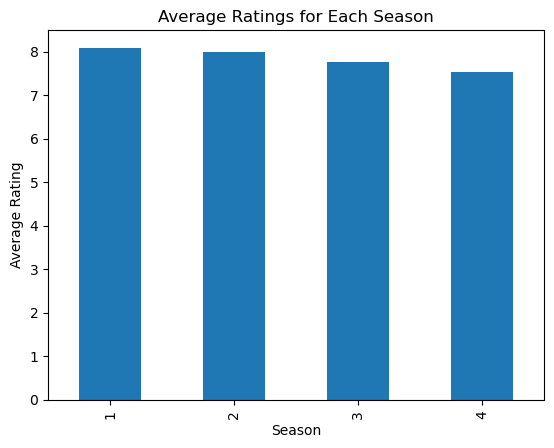

In [64]:
# Solution 8
import pandas as pd
import matplotlib.pyplot as plt

# Analysis: Ratings for each season
season_ratings = df2.groupby("season")["average_rating"].mean()
season_ratings.plot(kind="bar", xlabel="Season", ylabel="Average Rating", title="Average Ratings for Each Season")
plt.show()

In [66]:
# Analysis: Episode names with average rating > 8 for each season
high_rating_episodes = df2.groupby(["season", "name"]).filter(lambda x: x["average_rating"].mean() > 8)
high_rating_episodes = high_rating_episodes[["season", "name"]].drop_duplicates()
high_rating_episodes

,season,name
0,1,Westworld


In [67]:
# Analysis: Episode names aired before May 2019
before_2019_episodes = df2[df2["airdate"] < "2019-05"]
before_2019_episodes

,id,url,name,season,number,type,airdate,airtime,runtime,average_rating,summary,medium_image_link,original_image_link
0,869671,https://www.tvmaze.com/shows/1371/westworld,Westworld,1,1,regular,2016-10-02,21:00,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/shows/1371/westworld,Westworld,1,2,regular,2016-10-09,21:00,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/shows/1371/westworld,Westworld,1,3,regular,2016-10-16,21:00,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/shows/1371/westworld,Westworld,1,4,regular,2016-10-23,21:00,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/shows/1371/westworld,Westworld,1,5,regular,2016-10-30,21:00,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
5,932057,https://www.tvmaze.com/shows/1371/westworld,Westworld,1,6,regular,2016-11-06,21:00,60,8.0,"While Maeve convinces Felix to show her ""upsta...",https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
6,938404,https://www.tvmaze.com/shows/1371/westworld,Westworld,1,7,regular,2016-11-13,21:00,60,8.6,While William and Dolores travel to the unclai...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
7,943065,https://www.tvmaze.com/shows/1371/westworld,Westworld,1,8,regular,2016-11-20,21:00,60,7.9,Bernard tries to cope with what he did under R...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
8,943066,https://www.tvmaze.com/shows/1371/westworld,Westworld,1,9,regular,2016-11-27,21:00,60,8.5,Bernard forces Robert to take him back into hi...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
9,943067,https://www.tvmaze.com/shows/1371/westworld,Westworld,1,10,regular,2016-12-04,21:00,90,8.7,Delores finds out the truth about William's fa...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [70]:
# Analysis: Episode with highest and lowest rating for each season
highest_rating_episodes = df2.groupby("season")["average_rating"].idxmax()
lowest_rating_episodes = df2.groupby("season")["average_rating"].idxmin()
highest_rating_episodes_data = df2.loc[highest_rating_episodes, ["season", "name", "average_rating"]]
lowest_rating_episodes_data = df2.loc[lowest_rating_episodes, ["season", "name", "average_rating"]]

# Print the episodes with the highest rating for each season
print("Episodes with the highest rating for each season:")
print(highest_rating_episodes_data)

# Print the episodes with the lowest rating for each season
print("Episodes with the lowest rating for each season:")
print(lowest_rating_episodes_data)

Episodes with the highest rating for each season:
    season       name  average_rating
9        1  Westworld             8.7
17       2  Westworld             8.7
20       3  Westworld             8.0
32       4  Westworld             7.8
Episodes with the lowest rating for each season:
    season       name  average_rating
2        1  Westworld             7.6
14       2  Westworld             7.6
25       3  Westworld             7.5
28       4  Westworld             7.1


In [74]:
# Analysis: Summary for the most popular episode in each season
popular_episodes = df2.groupby("season")["average_rating"].idxmax()
popular_episodes_summary = df2.loc[popular_episodes, ["season", "name", "summary"]]
popular_episodes

season
1     9
2    17
3    20
4    32
Name: average_rating, dtype: int64

In [75]:
popular_episodes_summary

,season,name,summary
9,1,Westworld,Delores finds out the truth about William's fa...
17,2,Westworld,Another of Westworld's Host revolutionaries is...
20,3,Westworld,"If you're stuck in a loop, try walking in a st..."
32,4,Westworld,God is bored.


In [78]:
# Solution 9
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the provided link
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
df3 = pd.read_csv(url)

In [79]:
df3

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130438,7SAYGDEE6P,Pierce,Gig Harbor,WA,98335.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,26.0,231134102,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
130439,1N4BZ1CV7N,Pierce,Tacoma,WA,98408.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,29.0,185810943,POINT (-122.43810499999995 47.203220000000044),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
130440,5YJYGDEE8M,King,Seattle,WA,98109.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,36.0,176542418,POINT (-122.35022 47.63824),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
130441,5YJXCBE22L,Island,Camano Island,WA,98282.0,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293,0,10.0,102834938,POINT (-122.40049 48.23986),BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,5.302997e+10


In [82]:
# Get all the cars and their types that do not qualify for clean alternative fuel vehicle.
non_clean_fuel_cars = df3[df3["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] == "No"][["Make", "Model"]]
print("Cars that do not qualify for clean alternative fuel vehicle:")
print(non_clean_fuel_cars)

Cars that do not qualify for clean alternative fuel vehicle:
Empty DataFrame
Columns: [Make, Model]
Index: []


In [84]:
# Get all TESLA cars with the model year, and model type made in Bothell City:
tesla_cars_in_bothell = df3[(df3["Make"] == "TESLA") & (df3["City"] == "Bothell")][["Model Year", "Model"]]
print("TESLA cars made in Bothell City:")
print(tesla_cars_in_bothell)

TESLA cars made in Bothell City:
        Model Year    Model
39            2020  MODEL 3
217           2022  MODEL 3
218           2022  MODEL Y
222           2018  MODEL 3
292           2017  MODEL X
...            ...      ...
129778        2019  MODEL 3
129954        2021  MODEL 3
129976        2014  MODEL S
130295        2022  MODEL 3
130392        2018  MODEL 3

[2407 rows x 2 columns]


In [85]:
# Get all the cars that have an electric range of more than 100, and were made after 2015
electric_cars_greater_than_100_range = df3[(df3["Electric Range"] > 100) & (df3["Model Year"] > 2015)][["Make", "Model"]]
print("Cars with electric range greater than 100 and made after 2015:")
print(electric_cars_greater_than_100_range)

Cars with electric range greater than 100 and made after 2015:
          Make    Model
0        TESLA  MODEL X
2        TESLA  MODEL 3
4        TESLA  MODEL S
12       TESLA  MODEL 3
13       TESLA  MODEL 3
...        ...      ...
130417   TESLA  MODEL Y
130428  NISSAN     LEAF
130432   TESLA  MODEL Y
130436   TESLA  MODEL 3
130441   TESLA  MODEL X

[34066 rows x 2 columns]


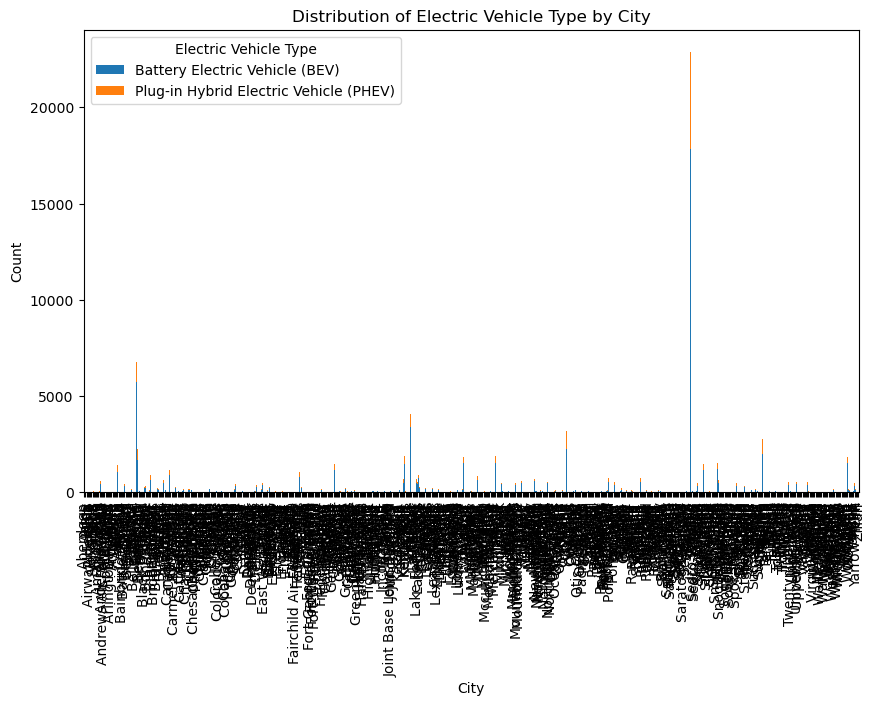

In [86]:
# Draw plots to show the distribution between city and electric vehicle type:
city_ev_type_distribution = df3.groupby(["City", "Electric Vehicle Type"]).size().unstack()
city_ev_type_distribution.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xlabel("City")
plt.ylabel("Count")
plt.title("Distribution of Electric Vehicle Type by City")
plt.legend(title="Electric Vehicle Type")
plt.show()

In [88]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [89]:
# Solution 10
from nltk.tokenize import word_tokenize

def count_pos_tags(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Perform part-of-speech tagging
    tagged_words = nltk.pos_tag(words)

    # Count the occurrences of each POS tag
    pos_counts = {"Verbs": 0, "Nouns": 0, "Pronouns": 0, "Adjectives": 0}
    for word, tag in tagged_words:
        if tag.startswith("VB"):
            pos_counts["Verbs"] += 1
        elif tag.startswith("NN"):
            pos_counts["Nouns"] += 1
        elif tag == "PRP" or tag == "PRP$":
            pos_counts["Pronouns"] += 1
        elif tag.startswith("JJ"):
            pos_counts["Adjectives"] += 1

    return pos_counts

# Get input text from the user
text = input("Enter a phrase or paragraph: ")

# Count POS tags in the input text
result = count_pos_tags(text)

# Print the counts of each POS tag
for pos, count in result.items():
    print(pos + ":", count)

Enter a phrase or paragraph: AI stands for Artificial Intelligence. It refers to the development of computer systems or machines that can perform tasks that typically require human intelligence. AI involves creating algorithms and models that enable machines to learn from data, recognize patterns, make decisions, and perform various tasks without explicit programming.  AI encompasses a wide range of techniques and approaches, including machine learning, deep learning, natural language processing, computer vision, and robotics. These technologies enable AI systems to understand, interpret, and respond to data and information in a way that mimics human intelligence.  AI has applications in various domains, including but not limited to healthcare, finance, transportation, education, and entertainment. It has the potential to revolutionize industries and transform the way we live and work.
Verbs: 21
Nouns: 49
Pronouns: 3
Adjectives: 12
